<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        RAISIN BINARY CLASSIFICATION MODELS
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Prediction with Logistic Regression + KNN + SVM + DTC </font></h2> 

---
    


![](https://github.com/Duygu-Jones/Machine-Learning-Projects/blob/main/Raisin_Types_Classification_ML_Models/RaisinGrain2x.png?raw=true)

### Introduction
This project aims to classify two different varieties of raisins (Besni and Keçimen) grown in Turkey using their morphological features. By performing Exploratory Data Analysis (EDA) and implementing logistic regression models, the goal is to build effective classification models for raisin variety prediction. the aim is to enhance the understanding of raisin varieties and improve classification accuracy.

### Objectives
- Understand the dataset and its features.
- Clean and prepare the data for modelling.
- Feature engineering.
- Implement logistic regression algorithms to classify raisin varieties.
- Optimize model performance by tuning hyperparameters and focusing on important features.
- Compare the performance of logistic regression with other classification algorithms.


*The dataset and results are used for educational purposes, demonstrating the application of advanced machine learning techniques on real-world data. We aim to build an effective classification model to predict the type of raisin grains and gain a deeper understanding of machine learning techniques.

### About the Dataset
The dataset contains two types of raisins (Keçimen and Besni) grown in Turkey. 
Images of Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted.

**Dataset:** Raisin Grain 
- **Content:** 2 type of raisins (Besni(0) and Keçimen(1)).
- **Number of Rows:** 900  
- **Number of Columns:** 8  


**INPUTS**
- `Area`: The number of pixels within the boundaries of the raisin grain.
- `Perimeter`: The distance between the boundaries of the raisin grain and the surrounding pixels.
- `MajorAxisLength`: The length of the longest line that can be drawn on the raisin grain.
- `MinorAxisLength`: The length of the shortest line that can be drawn on the raisin grain.
- `Eccentricity`: A measure of the eccentricity of the ellipse which has the same moments as the raisins.
- `ConvexArea`: The number of pixels in the smallest convex shell of the region formed by the raisin grain.
- `Extent`: The ratio of the region formed by the raisin grain to the total pixels in the bounding box.


**Reference**
- CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03

**Table of Contents**

1. <a href='#eda'>EXPLORATORY DATA ANALYSIS (EDA)</a>
   - 1.1 <a href='#missing'>Missing Values</a>
   - 1.2 <a href='#duplicated'>Duplicated Values</a>
   - 1.3 <a href='#statistics'>Basic Statistics</a>
   - 1.4 <a href='#categorical'>Categorical Features</a>
   - 1.5 <a href='#numerical'>Numerical Features</a>
   - 1.6 <a href='#feature-engineering'>Feature Engineering</a>
   - 1.7 <a href='#correlations'>Correlations</a>
   - 1.8 <a href='#outliers'>Outlier Analysis</a>
2. <a href='#ml-models'>MACHINE LEARNING MODELS</a>
   - 2.1 <a href='#train-test'>Splitting Train-Test</a>
   - 2.2 <a href='#logistic'>Logistic Regression with Pipeline</a>
      - 2.2.1 <a href='#model-validation'>Model Validation</a>
      - 2.2.2 <a href='#hyperparameter'>Hyperparameter Optimization</a>
   - 2.3 <a href='#svm'>Support Vector Machine</a>
   - 2.4 <a href='#knn'>K-Nearest Neighbours</a>
   - 2.5 <a href='#decision-tree'>Decision Tree Classifier</a>
   - 2.6 <a href='#compare'>Comparing the Models</a>
   - 2.7 <a href='#final-model'>Final Model</a>

<a id='eda'></a>
#  EXPLORATORY DATA ANALYSIS (EDA)

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

plt.rcParams["figure.figsize"] = (10,6)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df0 = pd.read_excel('/kaggle/input/raisin-dataset/Raisin_Dataset/Raisin_Dataset.xlsx')
df = df0.copy()

In [3]:
df.shape

(900, 8)

In [4]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [5]:
df.tail()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter  Class  
895   0.669   1129.072  Besni  
896   0.636   1214.252  Besni  
897   0.741   1292.828  Besni  
898   0.659   1258.548  Besni  
899   0.632   1272.862  Besni

<a id='missing'></a>
##  Missing Values

In [6]:
# Check out the missing values

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
Area                 0       0.000
MajorAxisLength      0       0.000
MinorAxisLength      0       0.000
Eccentricity         0       0.000
ConvexArea           0       0.000
Extent               0       0.000
Perimeter            0       0.000
Class                0       0.000

<a id='duplicated'></a>
## Duplicated Values

In [8]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


<a id='statistics'></a>
## Basic Statistics

In [9]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


<a id='categorical'></a>
## Categorical Features

In [11]:
# Target Feature

df.Class.value_counts() # Balanced Data

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

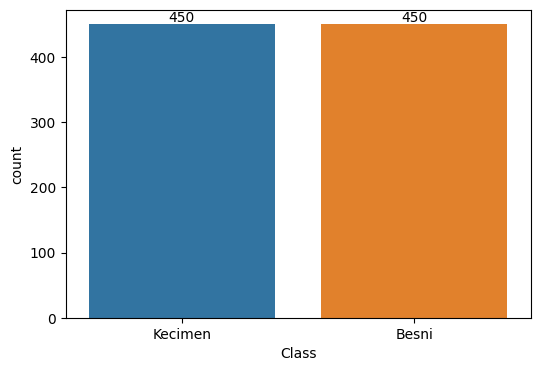

In [12]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='Class', data=df)
ax.bar_label(ax.containers[0]);

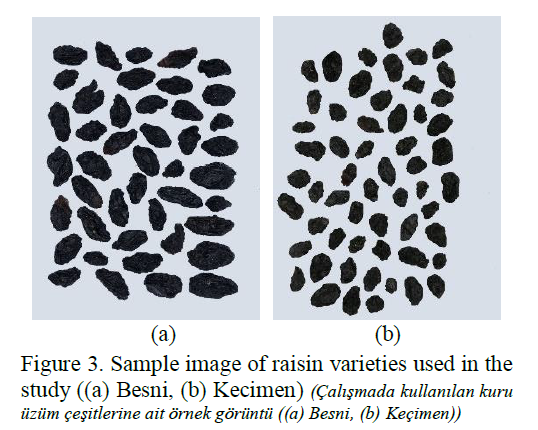

*CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03*

<a id='numerical'></a>
## Numerical Features

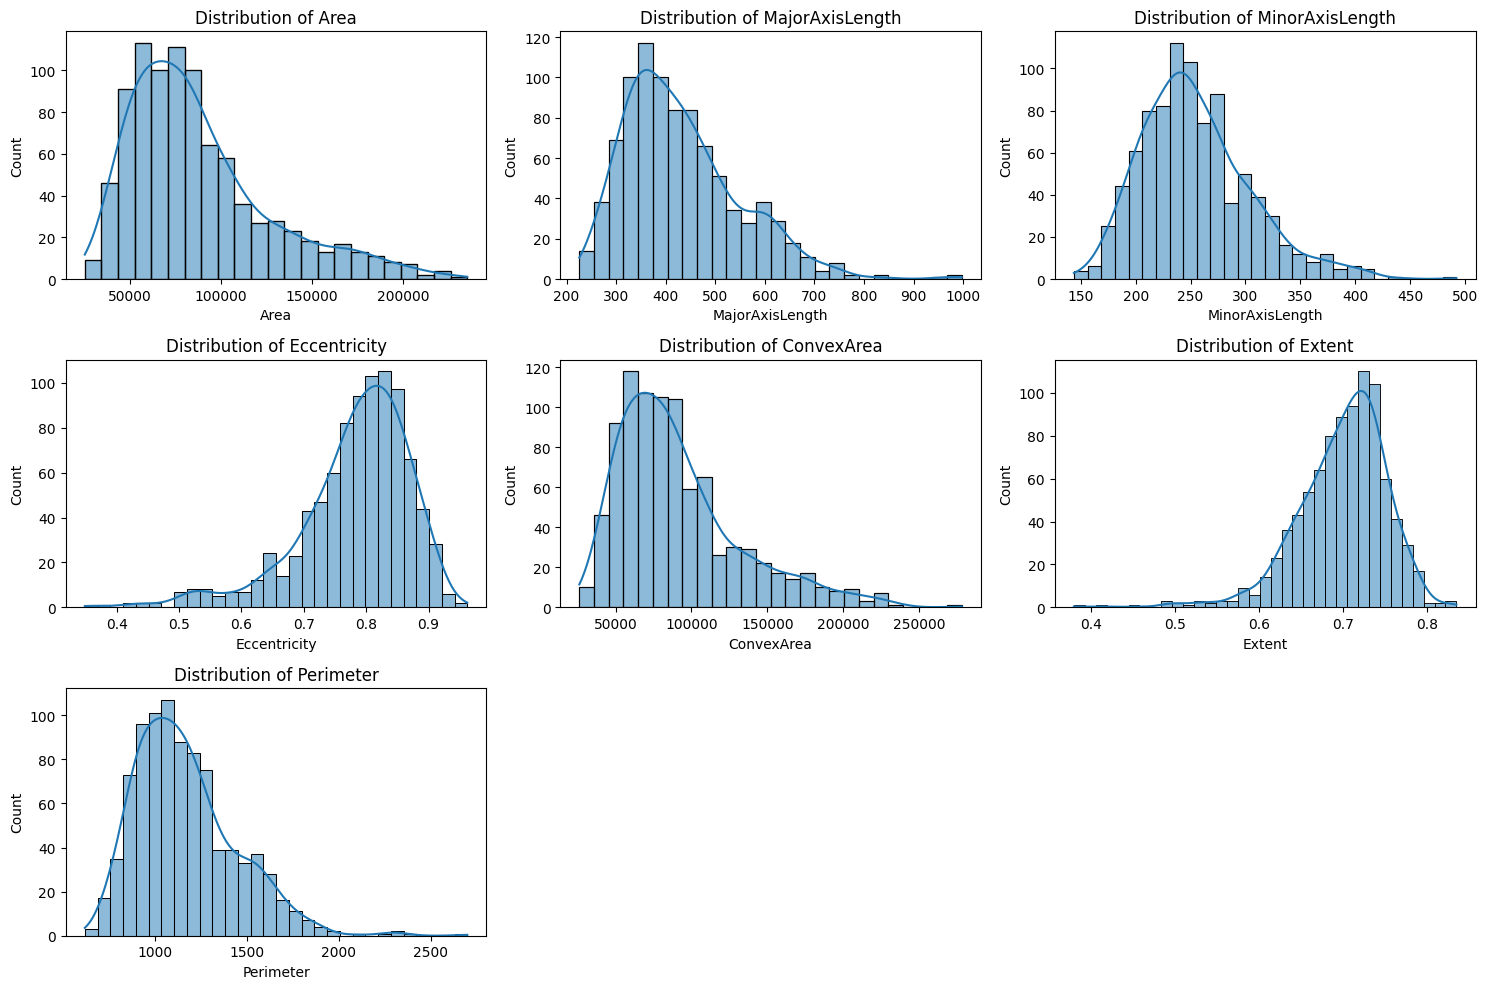

In [13]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

<a id='feature-engineering'></a>
## Feature Engineering

### Label the Target Feature

- 0: Besni
- 1: Kecimen

In [14]:
labelencoder = LabelEncoder()
df["target"] = labelencoder.fit_transform(df["Class"])

In [15]:
besni_count = df[df['target'] == 0].shape[0]
kecimen_count = df[df['target'] == 1].shape[0]

print(f"Besni (0) count: {besni_count}")
print(f"Keçimen (1) count: {kecimen_count}")

Besni (0) count: 450
Keçimen (1) count: 450


In [16]:
print(df.shape)
df.sample(3)

(900, 9)


Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
694  172783          820.724          352.194         0.903      219952   
649  113164          486.766          297.110         0.792      116531   
616  199015          615.417          413.927         0.740      201464   

     Extent  Perimeter  Class  target  
694   0.497   2289.889  Besni       0  
649   0.740   1313.092  Besni       0  
616   0.769   1687.866  Besni       0

In [17]:
df=df.drop(['Class'], axis=1)

In [18]:
print(df.shape)
df.head(3)

(900, 8)


Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   

   Perimeter  target  
0   1184.040       1  
1   1121.786       1  
2   1208.575       1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   target           900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


<a id='correlations'></a>
## Correlations

<Axes: >

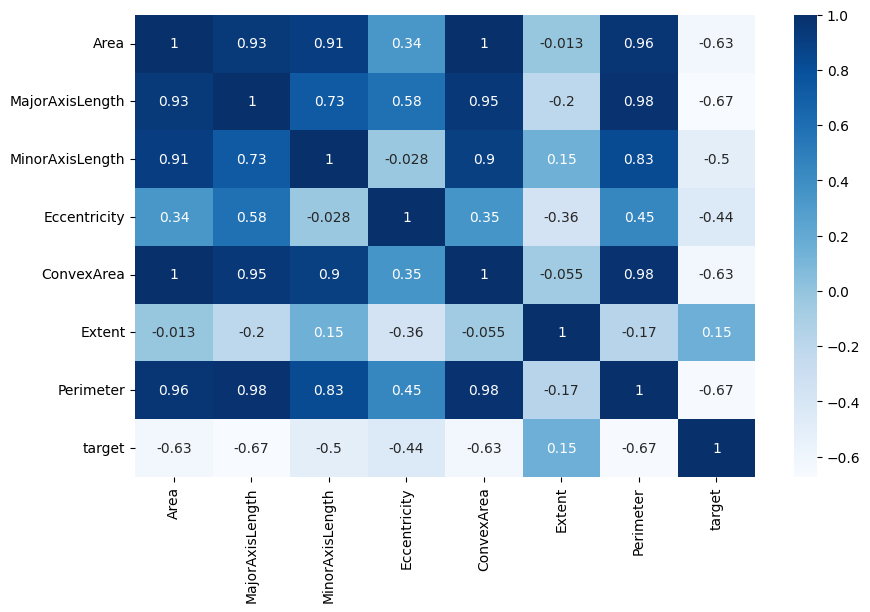

In [20]:
# 0: Besni
# 1: Kecimen

sns.heatmap(df.corr(), cmap='Blues', annot= True)

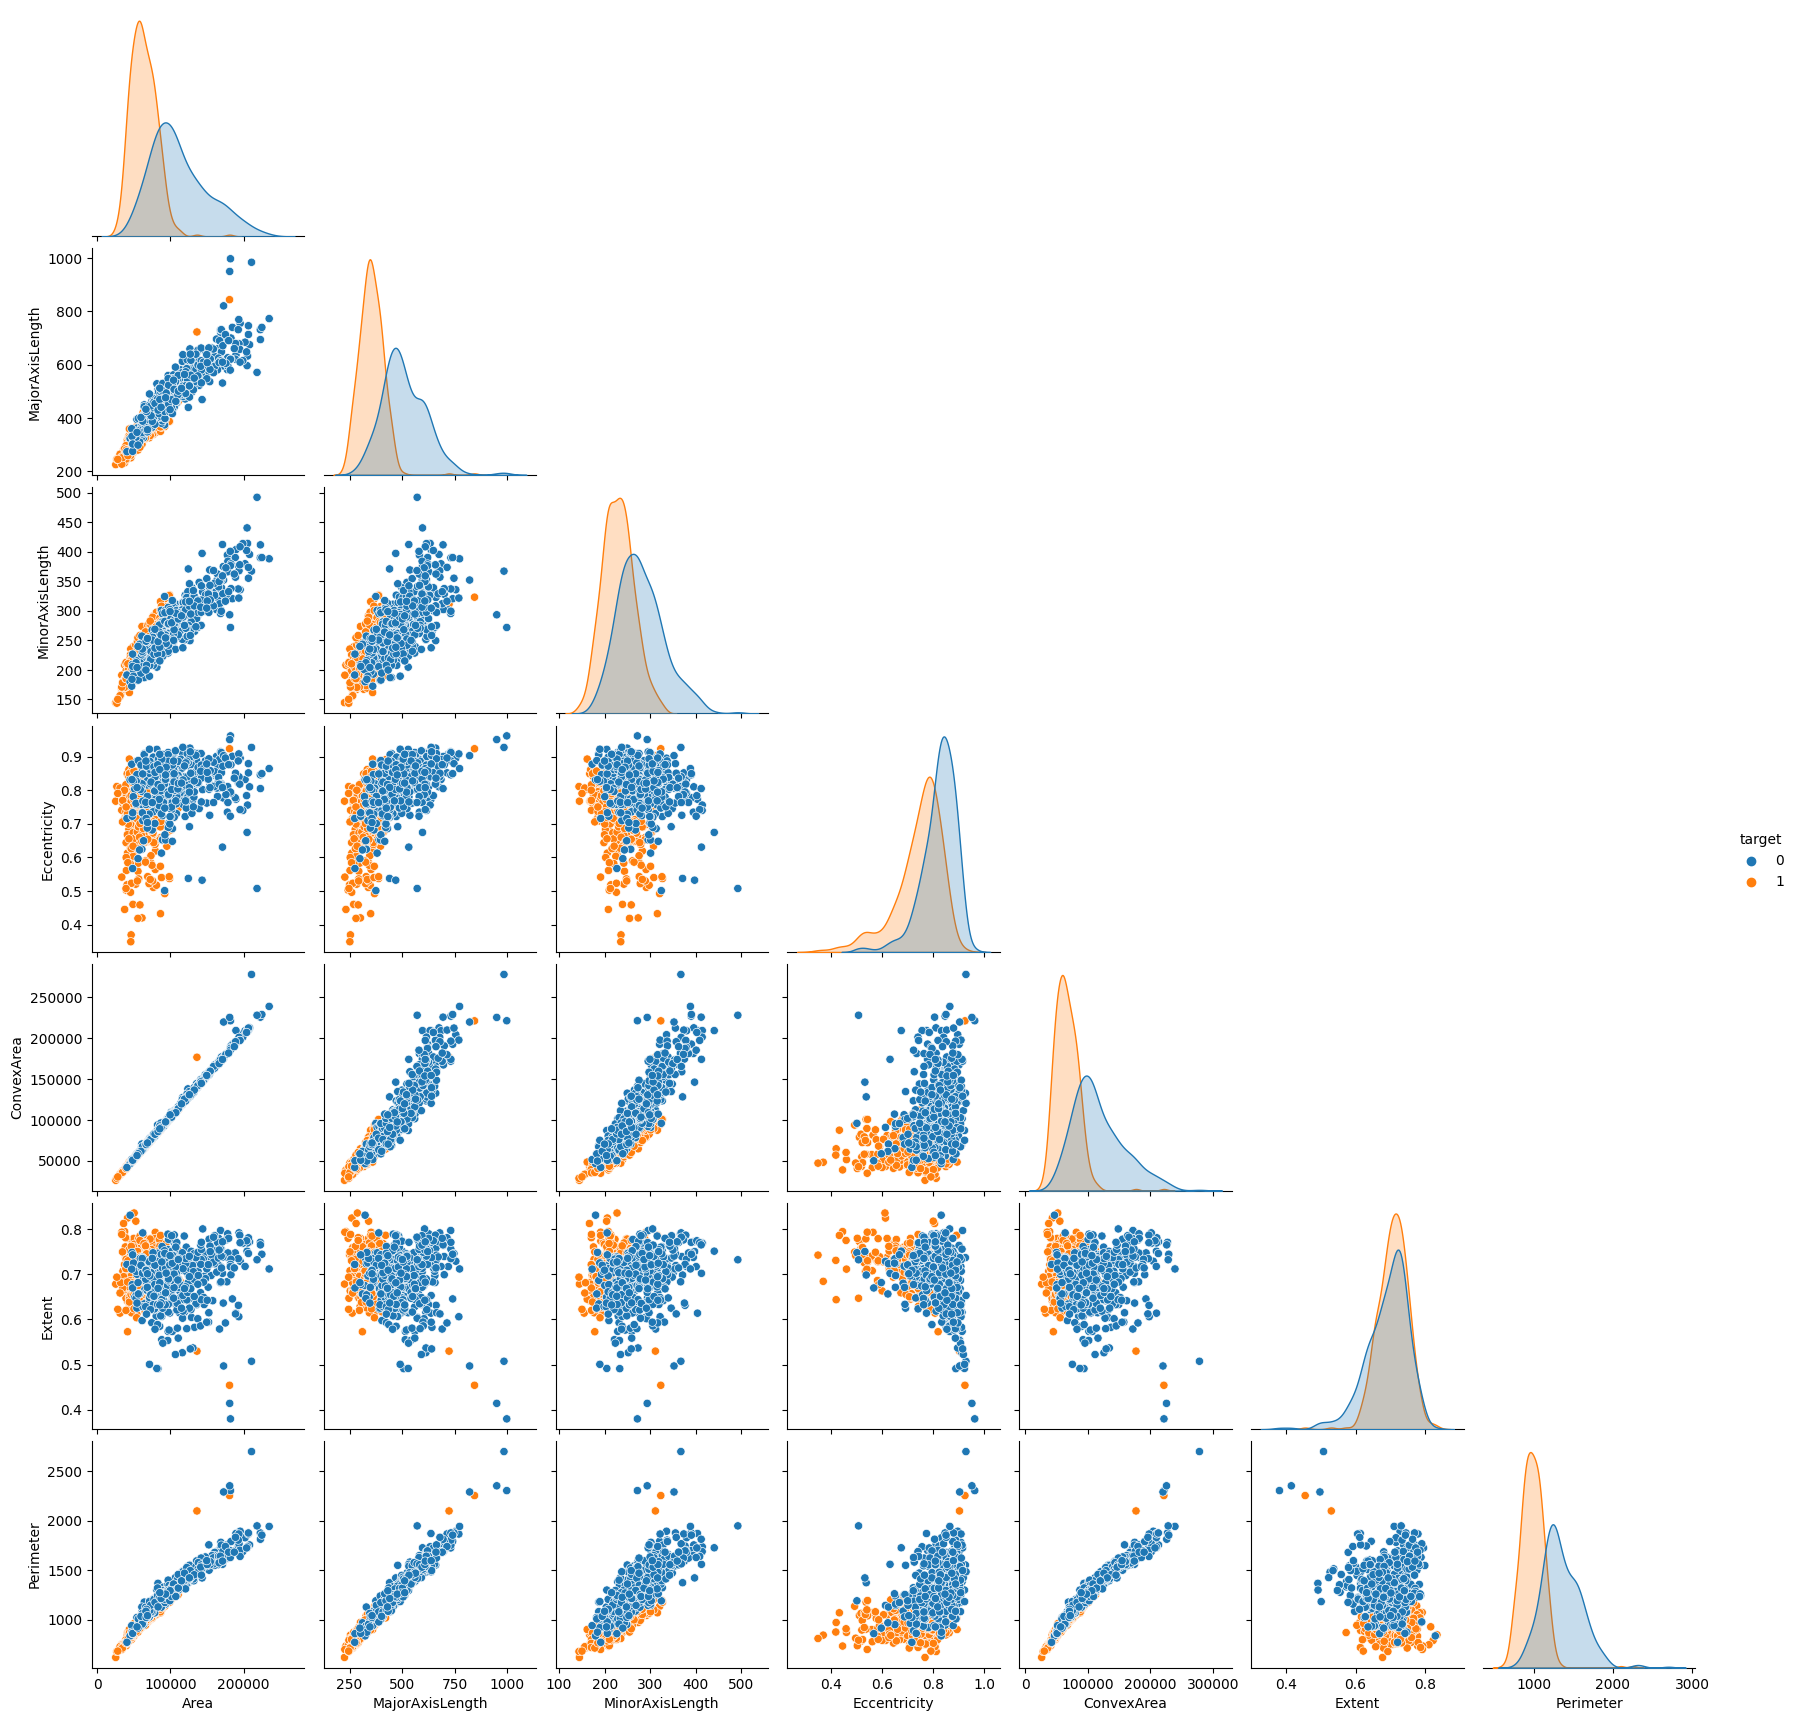

In [21]:
# 0: Besni
# 1: Kecimen

sns.pairplot(data=df, corner=True, hue='target');

In [22]:
corr = df.corr()['target'].sort_values(ascending=False)
corr

target             1.000
Extent             0.155
Eccentricity      -0.438
MinorAxisLength   -0.503
ConvexArea        -0.626
Area              -0.626
Perimeter         -0.666
MajorAxisLength   -0.673
Name: target, dtype: float64

<Axes: >

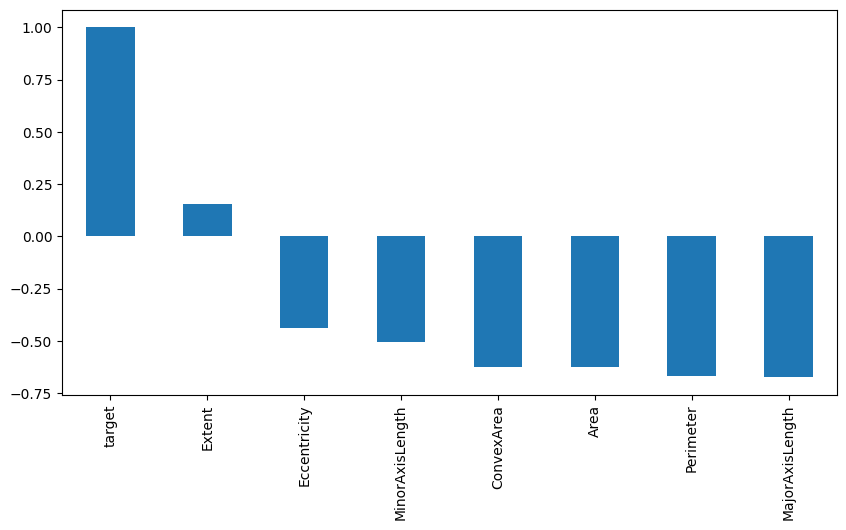

In [23]:
# 0: Besni
# 1: Kecimen

corr.plot(kind='bar',figsize=(10,5))

In [24]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df.corr().style.map(color_custom)

### Correlation Analysis

1. **Intercorrelated Features:**
   - **Area, MajorAxisLength, ConvexArea, and Perimeter:** These features are highly correlated with each other (above 0.9), indicating redundancy. 

<br>

2. **Correlations with Target (0: Besni, 1: Keçimen):**
   - **Area, MajorAxisLength, ConvexArea, and Perimeter:** Strong negative correlations with the target variable (-0.63 to -0.67). 
   - Higher values of these features make it more likely that the raisin is Besni.
   - **Eccentricity and MinorAxisLength:** Moderate negative correlations with the target (-0.44 and -0.5). 
   - Higher values of these features also suggest the raisin is more likely to be Besni.
   - **Extent:** Displays a low positive correlation with the target (0.15), 
   - indicating it may slightly increase the likelihood of the raisin being Keçimen, but it is not a strong predictor.

Managing the multicollinearity among highly correlated features is crucial for building a stable and accurate classification model.


<a id='outliers'></a>
## Outlier Analysis

### Logistic Regression and Outliers

- Logistic regression models can be sensitive to outliers, which can affect the performance and stability of the model. 
- Outliers can have a disproportionate influence on the model coefficients, leading to suboptimal decision boundaries and predictions. 
- Therefore, it is often advisable to address outliers before fitting a logistic regression model. 
* However, Outliers should be carefully considered when preparing data for logistic regression. 
* The decision to remove or retain outliers should be based on the specific context, nature of the data, and the goals of the analysis. 
* Addressing outliers appropriately can lead to more accurate and reliable logistic regression models.

#### When to Remove Outliers

1. **Skewed Data**: If outliers skew the data distribution significantly, removing them can help in normalizing the distribution, leading to better model performance.
2. **Influence on Model Coefficients**: If outliers have a large influence on the estimated coefficients, it may distort the model. Removing such outliers can help in achieving more robust coefficients.
3. **Error Reduction**: In cases where outliers are due to data entry errors or anomalies not representative of the underlying distribution, removing them can reduce noise and improve model accuracy.
4. **Improving Model Fit**: When diagnostics and residual analysis indicate that outliers adversely affect model fit and prediction accuracy, it’s beneficial to remove them.

#### When Not to Remove Outliers

1. **Genuine Data Points**: If outliers are genuine observations that reflect real variability in the data, they should not be removed, as they provide important information about the data distribution.
2. **Informative Outliers**: Sometimes outliers may carry valuable information about specific conditions or factors that should be modeled. Retaining them ensures the model captures these effects.
3. **Small Sample Size**: In datasets with a small number of observations, removing outliers can lead to loss of valuable data and reduce the model's generalizability.

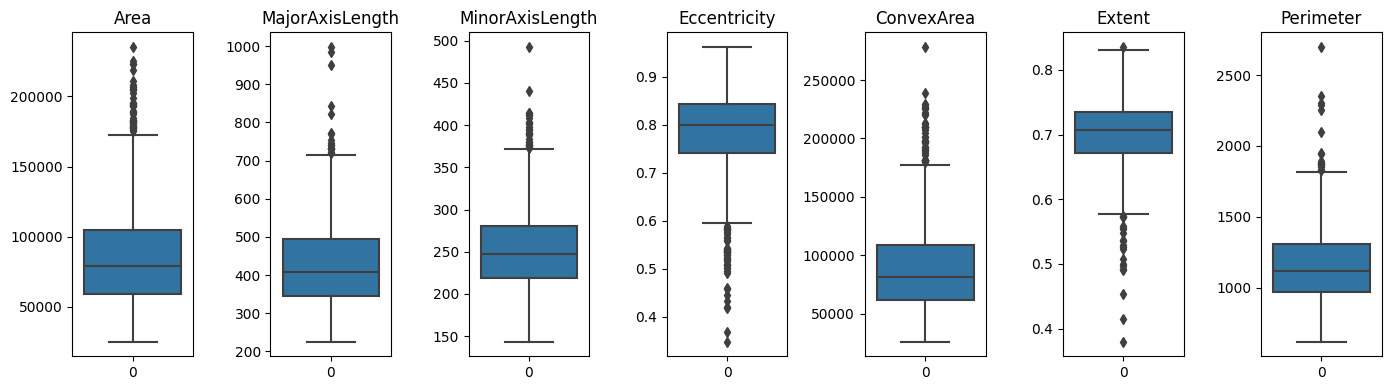

In [25]:
# Checking Outliers in Individual Features

x = 0
#Numerical features;  
numerical_columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter']
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numerical_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

plt.tight_layout() 
plt.show()

In [26]:
# 0: Besni | 1: Kecimen

df.target.value_counts()

target
1    450
0    450
Name: count, dtype: int64

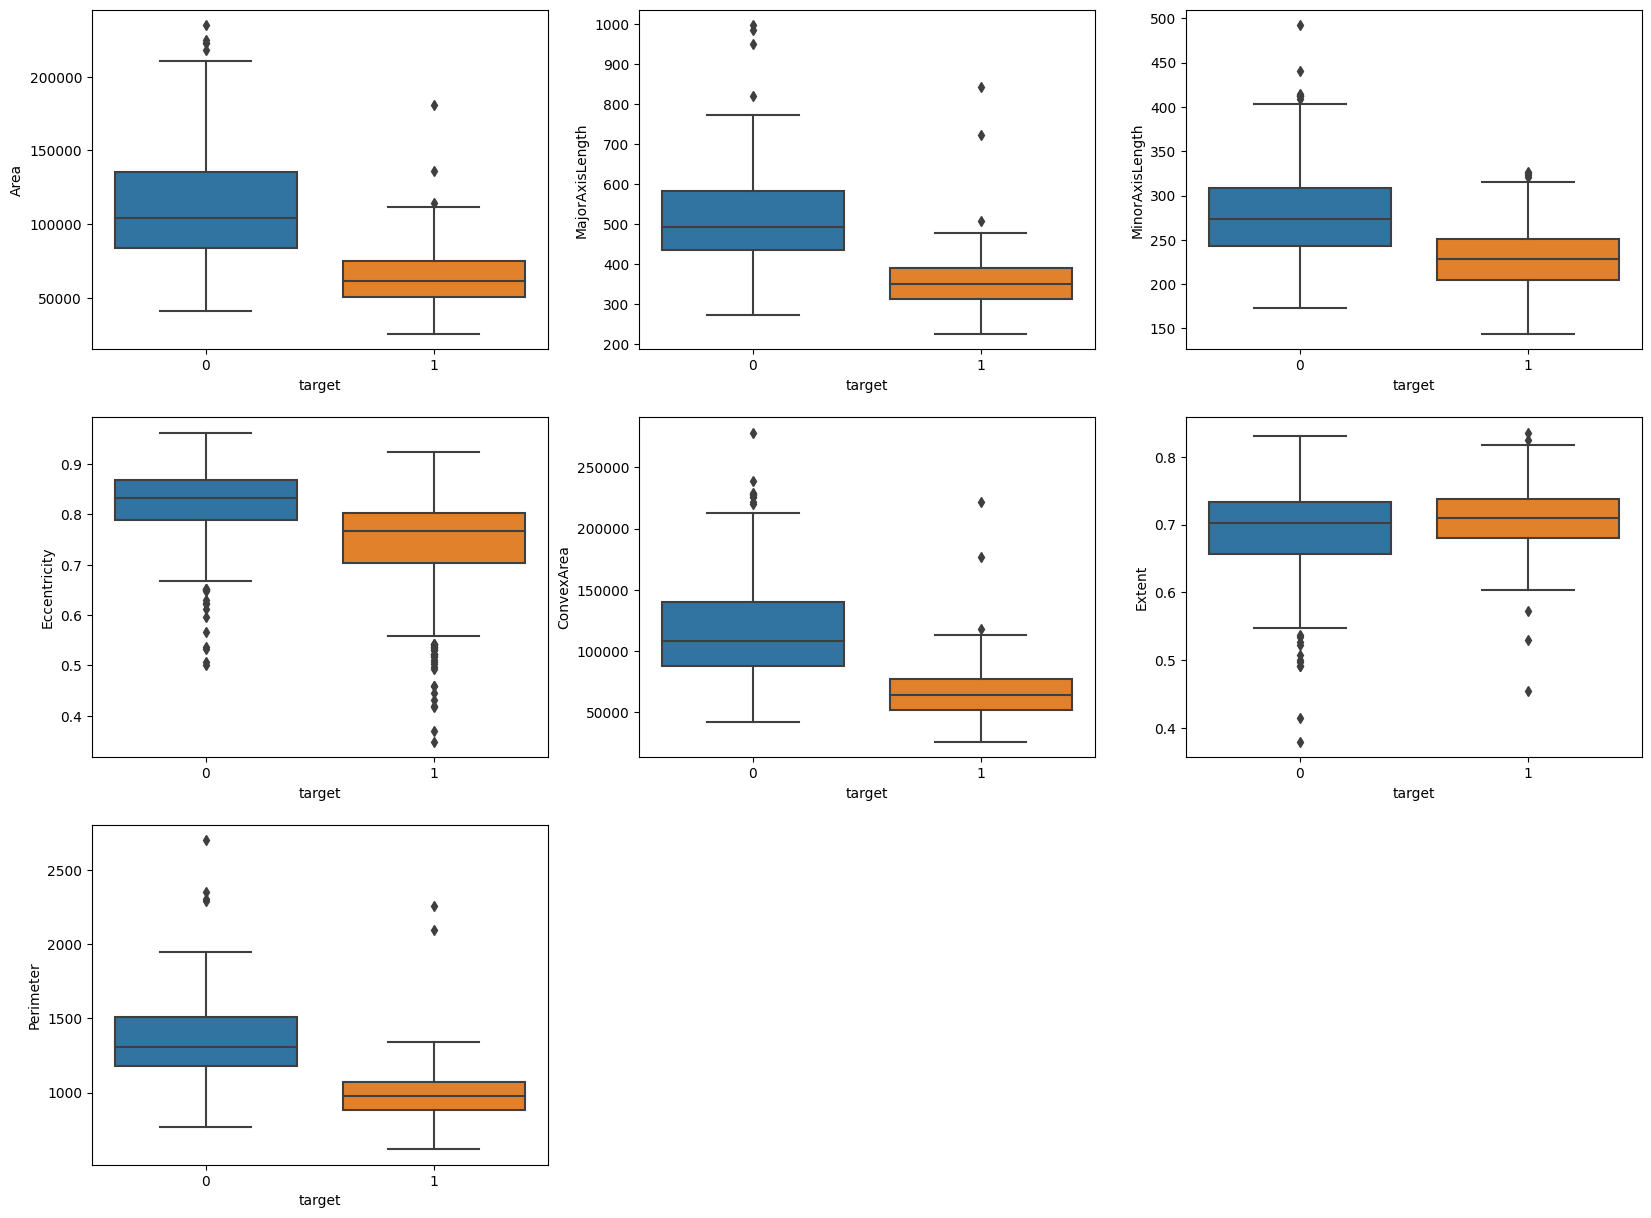

In [27]:
# Checking Outliers by the Target; 0: Besni | 1: Kecimen

index = 0
plt.figure(figsize=(20,15))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='target',y=feature,data=df)
plt.show()

**Analysis**
- The result reveals outliers in almost all features in the dataset except for Extent, indicating considerable variability in the morphological characteristics of the raisins.
- The Besni variety (target = 0) shows more outliers compared to the Keçimen variety (target = 1).
- **Most Effective Features:** Area, MajorAxisLength, ConvexArea, Perimeter, and Eccentricity are the most effective features for distinguishing between Besni and Keçimen varieties.
- **Less Effective Features:** MinorAxisLength shows moderate effectiveness, while Extent is the least effective feature for class separation.

**However, I will not intervene with outliers at the moment, but could take an action later according to the model's forecasting performance.**

<a id='ml-models'></a>
# MACHINE LEARNING MODELS

<a id='train-test'></a>
## Splitting Train-Test

In [28]:
X= df.drop(columns="target")
y= df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='logistic'></a>
## Logistic Regression with Pipeline

#### Model

In [30]:
# Set the model and Scale in the Pipeline

logistic_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [31]:
logistic_model["logistic"].coef_

array([[-2.73295414, -3.00314467, -1.14065412, -2.96268963, -2.77951842,
         1.35628873, -3.17332199]])

In [32]:
logistic_model.named_steps['scaler'].get_feature_names_out()

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'], dtype=object)

In [33]:
logistic_model["logistic"].intercept_

array([4.67125606])

#### Prediction

In [107]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

In [35]:
y_pred_proba = logistic_model.predict_proba(X_test) #returns the probability estimates for each class label
y_pred_proba[:5,:]

array([[0.71304677, 0.28695323],
       [0.23501451, 0.76498549],
       [0.04214933, 0.95785067],
       [0.89483378, 0.10516622],
       [0.0524295 , 0.9475705 ]])

In [36]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347          451.526          280.226         0.784       99256   
827   61861          345.944          235.430         0.733       67390   
231   52693          283.504          242.114         0.520       54860   
588  112808          542.505          267.202         0.870      116961   
39    49882          287.264          222.186         0.634       50880   

     Extent  Perimeter  target  
70    0.675   1255.245       1  
827   0.702   1063.621       0  
231   0.738    895.745       1  
588   0.743   1390.400       0  
39    0.766    843.764       1

In [37]:
# Create new column for 'predicted' classes to compore with actual target classes

test_data["pred"] = y_pred
test_data.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347          451.526          280.226         0.784       99256   
827   61861          345.944          235.430         0.733       67390   
231   52693          283.504          242.114         0.520       54860   
588  112808          542.505          267.202         0.870      116961   
39    49882          287.264          222.186         0.634       50880   

     Extent  Perimeter  target  pred  
70    0.675   1255.245       1     0  
827   0.702   1063.621       0     1  
231   0.738    895.745       1     1  
588   0.743   1390.400       0     0  
39    0.766    843.764       1     1

In [38]:
# Filtering incorrect predicted class labels of a data points in one df

wrong_pred = test_data[((test_data["target"] == 1) & (test_data["pred"] == 0)) |
                       ((test_data["target"] == 0) & (test_data["pred"] == 1))]


print(wrong_pred.shape)
wrong_pred

# The model has predicted 26 observations incorrectly. 

(26, 9)


Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70    95347          451.526          280.226         0.784       99256   
827   61861          345.944          235.430         0.733       67390   
731   84383          403.909          271.252         0.741       87629   
139  110616          461.145          306.899         0.746      112150   
168   92735          436.986          271.579         0.783       94693   
67    89235          443.516          258.947         0.812       91201   
688   57999          311.022          243.476         0.622       61519   
30    88745          429.770          265.690         0.786       90715   
298  105020          440.390          306.105         0.719      107423   
744   53077          327.288          212.231         0.761       55532   
396   75431          433.671          222.999         0.858       78125   
44    77310          436.530          228.280         0.852       80138   
826   47609          331.894          184.213         0.832       49720   
136   97026          455.972          273.054         0.801       99561   
218   72915          414.718          229.556         0.833       76912   
545   68231          394.647          228.161         0.816       71591   
398   82886          424.823          253.172         0.803       85879   
338   74612          430.865          229.287         0.847       79297   
481   75173          365.803          267.583         0.682       78359   
465   67579          402.310          217.059         0.842       70809   
807   78632          407.940          245.821         0.798       79715   
885   54502          346.458          204.081         0.808       56464   
363  103377          460.670          287.993         0.780      105569   
518   64303          442.745          187.029         0.906       67199   
693   49371          320.643          200.246         0.781       52692   
54   111450          478.311          298.631         0.781      113256   

     Extent  Perimeter  target  pred  
70    0.675   1255.245       1     0  
827   0.702   1063.621       0     1  
731   0.675   1140.605       0     1  
139   0.752   1252.875       1     0  
168   0.704   1183.447       1     0  
67    0.655   1179.694       1     0  
688   0.656    968.697       0     1  
30    0.752   1162.877       1     0  
298   0.715   1228.366       1     0  
744   0.646    934.708       0     1  
396   0.723   1103.236       1     0  
44    0.632   1141.189       1     0  
826   0.748    874.091       0     1  
136   0.671   1212.667       1     0  
218   0.680   1131.096       1     0  
545   0.665   1099.228       0     1  
398   0.648   1163.528       1     0  
338   0.665   1140.399       1     0  
481   0.680   1087.034       0     1  
465   0.703   1051.553       0     1  
807   0.689   1068.727       0     1  
885   0.636    927.283       0     1  
363   0.727   1230.233       1     0  
518   0.686   1081.680       0     1  
693   0.675    921.059       0     1  
54    0.690   1298.188       1     0

In [131]:
log_y_pred = logistic_model.predict(X_test)
LR = accuracy_score(y_test, log_y_pred)
LR

0.8555555555555555

#### Model Performance 

In [39]:
# Function to Evaluate the Model Performans using Classification Confusion_matrix() 

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
# Evaluating the Model Performance using Classification Metrics

log_scores = eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[74 12]
 [14 80]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[303  61]
 [ 37 319]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       364
           1       0.84      0.90      0.87       356

    accuracy                           0.86       720
   macro avg       0.87      0.86      0.86       720
weighted avg       0.87      0.86      0.86       720



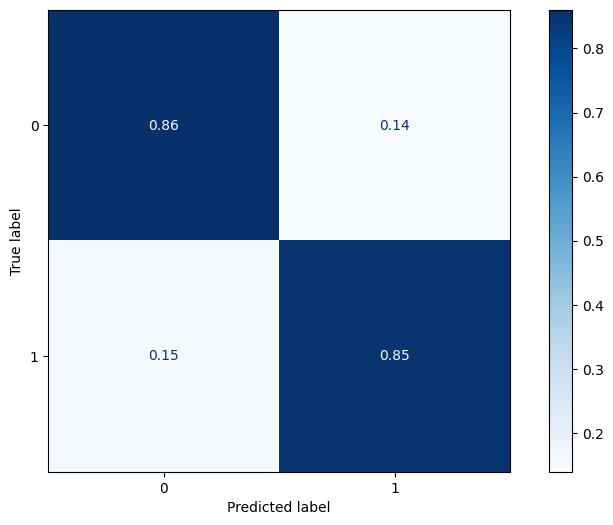

In [41]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test,y_test, normalize='true', cmap='Blues' )

- True Negative (TN): top left
- False Positive (FP): top right
- False Negative (FN): bottom left
- True Positive (TP): bottom right

<a id='model-validation'></a>
### Model Validation

In [42]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=5, # 5-folded
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) # CV has 5 iteration.
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1     0.011       0.010          0.868           0.865           0.853   
2     0.009       0.010          0.882           0.863           0.875   
3     0.013       0.009          0.868           0.863           0.833   
4     0.010       0.011          0.799           0.885           0.769   
5     0.009       0.011          0.903           0.854           0.861   

   train_precision  test_recall  train_recall  test_f1  train_f1  
1            0.841        0.889         0.894    0.871     0.867  
2            0.837        0.887         0.898    0.881     0.866  
3            0.841        0.915         0.891    0.872     0.865  
4            0.857        0.845         0.923    0.805     0.889  
5            0.834        0.958         0.881    0.907     0.857

In [43]:
df_scores.mean()[2:]

test_accuracy     0.864
train_accuracy    0.866
test_precision    0.838
train_precision   0.842
test_recall       0.899
train_recall      0.897
test_f1           0.867
train_f1          0.869
dtype: float64

<a id='hyperparameter'></a>
### Hyperparameter Optimization:

In [44]:
logistic_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [45]:
# Hyperparameters Tuning with GridSearchSV 

# Define the pipeline steps
model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20)   # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"]  # Optimization algorithms

# Create the parameter grid
param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "accuracy", 
                          n_jobs = -1,             # Use all available cores
                          return_train_score=True) # Return training scores

In [ ]:
grid_model.fit(X_train, y_train)

In [47]:
grid_model.best_params_

{'logistic__C': 1.8329807108324356,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [48]:
grid_model.best_score_

0.8694444444444445

### Prediction with Grid_Model

In [114]:
# Prediction with Test Data

y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

In [109]:
# Prediction with Train Data
y_train_pred = grid_model.predict(X_train) 
y_train_pred_proba = grid_model.predict_proba(X_train) 

In [110]:
average_precision_score(y_train, y_train_pred_proba[:,1]) # Accuracy score for balanced data

0.9044538542126601

In [140]:
grid_y_pred = grid_model.predict(X_test)
GLR = accuracy_score(y_test, grid_y_pred)
GLR

0.8722222222222222

###  Evaluating the Model Performance

In [111]:
# Evaluating the Model Performance using Classification Metrics

grid_scores = eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 10]
 [13 81]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        86
           1       0.89      0.86      0.88        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[307  57]
 [ 38 318]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       364
           1       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



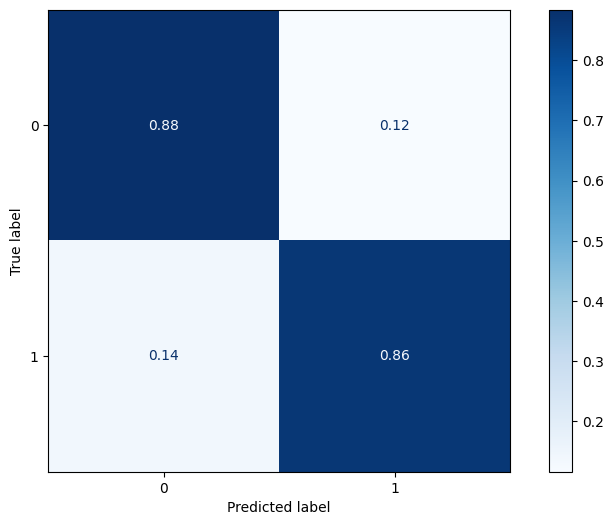

In [50]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test,y_test, normalize='true', cmap='Blues' )

### ROC (Receiver Operating Curve) & AUC (Area Under Curve)

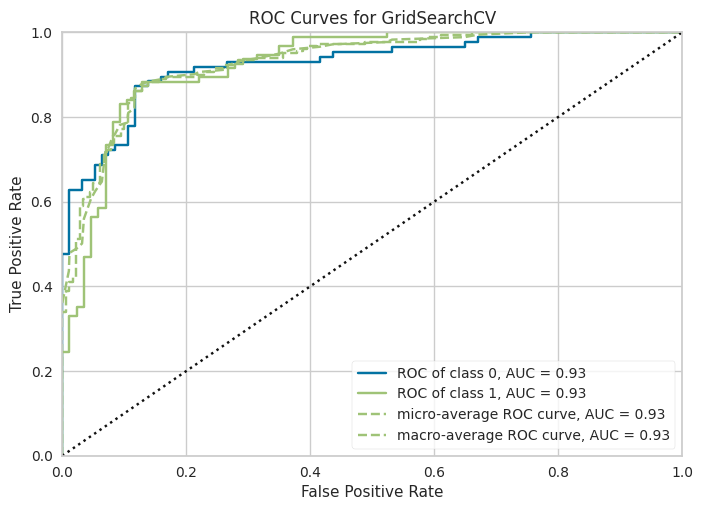

In [112]:
#Finding Best Thresholds

from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [113]:
# Let's see the best thresholds

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:, 1])


dict = {
    "precisions": precisions[:-1],
    "recalls": recalls[:-1],
    "threshold": thresholds
}
df_metric = pd.DataFrame(dict).sort_values(by=["recalls", "precisions"],
                                           ascending=False)
df_metric.head(12)

# The purpose is identifying the optimal threshold value that maximizes recall while achieving the highest possible precision.

#The best threshold value could be 0.103 because it provides a high recall (0.994) along with a higher precision (0.633). 
# This helps the model make more balanced and accurate predictions.
# The best threshold (0.103) is on the 161st index row. After that, recall remains stable but precision decreases!

precisions  recalls  threshold
2         0.496    1.000      0.000
1         0.495    1.000      0.000
0         0.494    1.000      0.000
8         0.499    0.997      0.001
7         0.498    0.997      0.001
6         0.497    0.997      0.001
5         0.497    0.997      0.001
4         0.496    0.997      0.000
3         0.495    0.997      0.000
161       0.633    0.994      0.103
160       0.632    0.994      0.098
159       0.631    0.994      0.097

In [97]:
optimal_threshold = 0.103

predict_proba = grid_model.predict_proba(X_train)[:,1]

prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba]


print(confusion_matrix(y_train, prediction))
print(classification_report(y_train, prediction))

[[159 205]
 [  2 354]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       364
           1       0.63      0.99      0.77       356

    accuracy                           0.71       720
   macro avg       0.81      0.72      0.69       720
weighted avg       0.81      0.71      0.69       720



In [99]:
# Prediction on test data with optimal threshold;

def pred_bestTreshold(model, X_test, optimal_threshold = 0.103):
    predict_proba = model.predict_proba(X_test)
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    return prediction

In [100]:
predictions = pred_bestTreshold(grid_model, X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[34 52]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        86
           1       0.64      1.00      0.78        94

    accuracy                           0.71       180
   macro avg       0.82      0.70      0.68       180
weighted avg       0.81      0.71      0.68       180



<a id='svm'></a>
## Support Vector Machine

In [139]:
# creating an instance of SVM class
svm_model = SVC()
svm_model.fit(X_train, y_train)

# maing predictions
svm_y_pred = svm_model.predict(X_test)

# checking score
SVM = accuracy_score(y_test, svm_y_pred)

SVM
# printing Classification Report
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        86
           1       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



<a id='knn'></a>
## K-Nearest Neighbours

In [123]:
# building a function to test best neighbour 
def KNN(k):
    # building a KNN model (default k=5)
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # fitting the model to the training data
    knn_model.fit(X_train, y_train)

    # making predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    # evaluating the model's accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    return accuracy_knn

In [136]:
# finding the best n value
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

best_accuracy = 0
best_k = None

for k in k_values:
    accuracy = KNN(k)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best Accuracy: {0:0.5f} for K = {1}".format(best_accuracy, best_k))

KNN = best_accuracy
KNN

Best Accuracy: 0.85556 for K = 10


0.8555555555555555

<a id='decision-tree'></a>
## Decision Tree Classifier

In [125]:
# Creating an instance of Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth = 10)

# Fitting the model to the training data
dt_model.fit(X_train, y_train)

# Making predictions
dt_y_pred = dt_model.predict(X_test)

# Checking accuracy
DTC = accuracy_score(y_test, dt_y_pred)

# Printing Classification Report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        86
           1       0.84      0.81      0.83        94

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



<a id='compare'></a>
## Comparing the Models

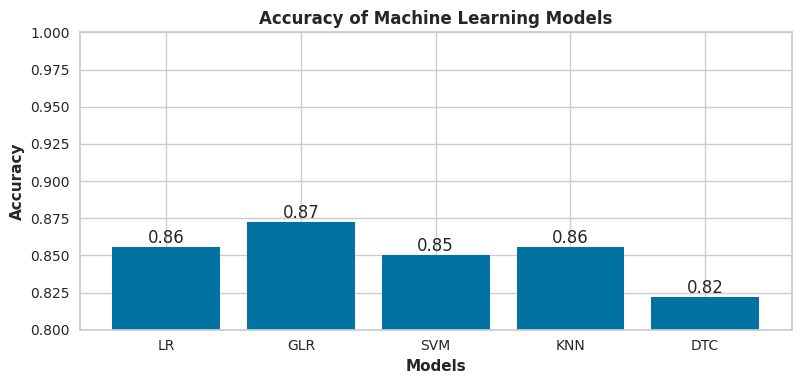

In [145]:
# Accuracy dictionary
accuracy_dict = {"LR": LR, "GLR": GLR, "SVM": SVM, "KNN": KNN, "DTC": DTC}

# Plotting accuracy scores
plt.figure(figsize=(8,4))
bars = plt.bar(list(accuracy_dict.keys()), list(accuracy_dict.values()))

# Adding annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy of Machine Learning Models', fontweight='bold')
plt.tight_layout()
plt.ylim(0.8, 1)
plt.show()

Based on the evaluation metrics, the **Grid Logistic Regression (GLR)** model should be selected as the final model. Here are the reasons:

1. **Highest Accuracy**: The GLR model has the highest accuracy at 0.87, meaning it makes the most correct predictions overall.

2. **Balanced Performance**:
   - **Precision and Recall**: The GLR model shows balanced precision and recall for both classes. For class 0, precision is 0.85 and recall is 0.88. For class 1, precision is 0.89 and recall is 0.86. This balance indicates the model is effective at identifying both classes.
   - **F1-Score**: High F1-scores (0.87 for class 0 and 0.88 for class 1) demonstrate the model’s strength in balancing precision and recall.

3. **Consistency**:
   - The GLR model performs consistently on the training set with an accuracy of 0.87, showing it is well-fitted and not overfitting the data.

4. **Comparison with Other Models**:
   - **Logistic Regression**: Slightly lower accuracy at 0.86 and less balanced precision and recall.
   - **SVM**: Lower accuracy at 0.85 with less balanced precision and recall.
   - **Decision Tree**: Lowest accuracy at 0.82, making it less reliable.

5. **Generalization Capability**: The GLR model generalizes well to new data, ensuring reliability in real-world applications.

In summary, the GLR model’s superior accuracy, balanced performance, and consistency make it the best choice for the final model.

<a id='final-model'></a>
## Final Model

#### Best Parameters from the Grid Logistic Model

In [124]:
grid_model.best_params_

{'logistic__C': 1.8329807108324356,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [101]:
final_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression(C=0.1,penalty='l2', solver='lbfgs'))])

final_model.fit(X, y)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=0.1))])

In [102]:
import pickle 

pickle.dump(final_model, open('final_model','wb')) # export the final model in local -> serilarization

In [ ]:
final_model = pickle.load(open('final_model','rb')) # import the final model to use -> deserilization

### Prediction with a new sample

In [103]:
new_data_sample = {
    "Area": [87524, 61600, 52266, 51180, 55787, 83248, 87350, 99657, 93523, 85609],
    "MajorAxisLength": [442.2460114, 350.1827545, 320.4425614, 288.6310651, 333.7034529, 430.0773077, 440.7356978, 431.7069809, 476.3440939, 512.0817743],
    "MinorAxisLength": [253.291155, 225.8427713, 213.8574996, 226.6304906, 226.9512079, 247.8386945, 259.2931487, 298.8373229, 254.1760536, 215.2719758],
    "Eccentricity": [0.819738392, 0.764243075, 0.744715834, 0.619253764, 0.733120775, 0.817262582, 0.802682995, 0.721864076, 0.84573851, 0.907345395],
    "ConvexArea": [90546, 63397, 54116, 52396, 59520, 85839, 90899, 106264, 97653, 89197],
    "Extent": [0.758650579, 0.746829611, 0.684289081, 0.737442725, 0.688592377, 0.66879293, 0.636476246, 0.741098519, 0.658798253, 0.632019963],
    "Perimeter": [1184.04, 972.472, 923.19, 855.997, 977.425, 1129.072, 1214.252, 1292.828, 1258.548, 1272.862]
}

In [104]:
new_test_data = pd.DataFrame(new_data_sample)
new_test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  61600          350.183          225.843         0.764       63397   0.747   
2  52266          320.443          213.857         0.745       54116   0.684   
3  51180          288.631          226.630         0.619       52396   0.737   
4  55787          333.703          226.951         0.733       59520   0.689   
5  83248          430.077          247.839         0.817       85839   0.669   
6  87350          440.736          259.293         0.803       90899   0.636   
7  99657          431.707          298.837         0.722      106264   0.741   
8  93523          476.344          254.176         0.846       97653   0.659   
9  85609          512.082          215.272         0.907       89197   0.632   

   Perimeter  
0   1184.040  
1    972.472  
2    923.190  
3    855.997  
4    977.425  
5   1129.072  
6   1214.252  
7   1292.828  
8   1258.548  
9   1272.862

In [86]:
# Prediction

predictions = final_model.predict(new_test_data)

In [87]:
# Probability of the Positive class (1)
positive_class_proba = final_model.predict_proba(new_test_data)[:, 1]
positive_class_proba

array([0.47085013, 0.67938162, 0.72790826, 0.80112732, 0.70181434,
       0.48450128, 0.4421438 , 0.42930943, 0.38275814, 0.37703478])

In [88]:
results = pd.DataFrame({
    'Prediction': predictions,
    'Positive Probability': positive_class_proba
})

results

Prediction  Positive Probability
0           0                 0.471
1           1                 0.679
2           1                 0.728
3           1                 0.801
4           1                 0.702
5           0                 0.485
6           0                 0.442
7           0                 0.429
8           0                 0.383
9           0                 0.377

In [89]:
new_test_data["pred"] = predictions
new_test_data['Positive Probability'] = positive_class_proba
new_test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  61600          350.183          225.843         0.764       63397   0.747   
2  52266          320.443          213.857         0.745       54116   0.684   
3  51180          288.631          226.630         0.619       52396   0.737   
4  55787          333.703          226.951         0.733       59520   0.689   
5  83248          430.077          247.839         0.817       85839   0.669   
6  87350          440.736          259.293         0.803       90899   0.636   
7  99657          431.707          298.837         0.722      106264   0.741   
8  93523          476.344          254.176         0.846       97653   0.659   
9  85609          512.082          215.272         0.907       89197   0.632   

   Perimeter  pred  Positive Probability  
0   1184.040     0                 0.471  
1    972.472     1                 0.679  
2    923.190     1                 0.728  
3    855.997     1                 0.801  
4    977.425     1                 0.702  
5   1129.072     0                 0.485  
6   1214.252     0                 0.442  
7   1292.828     0                 0.429  
8   1258.548     0                 0.383  
9   1272.862     0                 0.377

### Conclusion

In this project, we performed a comprehensive analysis to classify raisin varieties using their morphological features. Here are the key steps and findings:

1. **Exploratory Data Analysis (EDA)**:
   - Conducted thorough EDA to understand the dataset.
   - Identified and handled missing and duplicated values.
   - Analyzed basic statistics, categorical and numerical features.
   - Performed feature engineering, correlation analysis, and outlier detection.

2. **Machine Learning Models**:
   - Implemented several machine learning models:
     - **Logistic Regression**
     - **Support Vector Machine (SVM)**
     - **K-Nearest Neighbors (KNN)**
     - **Decision Tree Classifier**
   
3. **Model Comparison and Selection**:
   - Among all models, the **Grid Logistic Regression (GLR)** model demonstrated the highest accuracy and balanced performance.
   - **GLR Model Performance**:
     - Accuracy: 0.87
     - Balanced precision and recall values.
   - This indicates that the GLR model is robust and reliable for accurately identifying both raisin varieties.

The structured approach and thorough analysis ensured the selection of the most effective model for raisin classification.

<h3 align="center">If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion on Kaggle!</h3>

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---